In [5]:
import csv

coords = []  # will hold a list of (x, y) tuples

with open("dataset/processed/p_sikku/csv_s/processed_kolam_54_sikku.csv", "r") as f:
    reader = csv.reader(f)
    next(reader)  # skip the header line "x,y"
    for row in reader:
        x = float(row[0])
        y = float(row[1])
        coords.append((x, y))

print(coords[:5])  # show first few points


[(100.0, 178.0), (46.0, 150.0), (46.0, 96.0), (72.0, 152.0), (152.0, 208.0)]


In [6]:
import numpy as np

grid_size = 32
img_w = 616
img_h = 616

grid = np.zeros((grid_size, grid_size), dtype=np.uint8)

for (x, y) in coords:          # coords is your list from Step 2
    gx = int(round(x * (grid_size - 1) / img_w))
    gy = int(round(y * (grid_size - 1) / img_h))
    grid[gy, gx] = 1

print(grid)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


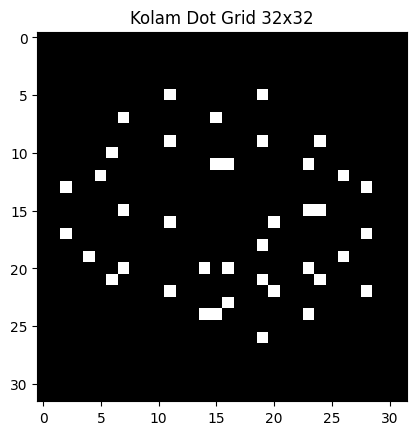

In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# --- Settings ---
csv_path   = "dataset/processed/p_kambi/csv_k/kol_k_67_dots.csv"   # path to your dot-coordinate CSV
grid_size  = 32
img_w      = 256    # actual width of the image used for detection
img_h      = 256    # actual height of the image used for detection
save_path  = "dataset/processed/p_pulli/grids_p/kol_p_01.npy"   # where to save the 0/1 grid

# --- Step 1: read coordinates from CSV ---
coords = []
with open(csv_path, "r") as f:
    reader = csv.reader(f)
    next(reader)  # skip header row "x,y"
    for row in reader:
        x = float(row[0])
        y = float(row[1])
        coords.append((x, y))

# --- Step 2: build 32×32 binary grid ---
grid = np.zeros((grid_size, grid_size), dtype=np.uint8)

for (x, y) in coords:
    gx = int(round(x * (grid_size - 1) / img_w))
    gy = int(round(y * (grid_size - 1) / img_h))
    grid[gy, gx] = 1

# --- Step 3: display to verify ---
plt.imshow(grid, cmap="gray", interpolation="nearest")
plt.title("Kolam Dot Grid 32x32")
plt.show()

# --- Step 4: save for later use ---
#np.save(save_path, grid)        # fast binary format
# Optional human-readable CSV:
# np.savetxt(save_path.replace(".npy", ".csv"), grid, fmt="%d", delimiter=",")


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# ======= USER SET =======
input_folder = "dataset/processed/p_kambi/csv_k"  # folder containing all CSV files
output_folder = "dataset/processed/p_kambi/grids_k"                             # folder to save .npy grids
grid_size = 32                                      # output grid size
show_image = False                                  # True if you want to see each grid
# ========================

# Make sure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get all CSV files in the input folder
csv_files = glob(os.path.join(input_folder, "*.csv"))

for csv_file in csv_files:
    # Load CSV, skip header, take first 2 columns (x, y)
    dots = np.loadtxt(csv_file, delimiter=',', skiprows=1)[:, :2]

    # Initialize empty grid
    grid = np.zeros((grid_size, grid_size), dtype=int)

    # Map dot positions to grid
    for dot in dots:
        x = int(dot[0] / 256 * grid_size)
        y = int(dot[1] / 256 * grid_size)
        x = min(x, grid_size-1)
        y = min(y, grid_size-1)
        grid[y, x] = 1

    # Show grid image if needed
    if show_image:
        plt.imshow(grid, cmap='gray')
        plt.title(os.path.basename(csv_file))
        plt.axis('off')
        plt.show()

    # Save .npy grid
    base_name = os.path.splitext(os.path.basename(csv_file))[0]
    save_path = os.path.join(output_folder, f"{base_name}.npy")
    np.save(save_path, grid)
    print(f"Saved: {save_path}")

print("All CSV files processed!")


Saved: dataset/processed/p_kambi/grids_k\kol_k_01_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_02_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_03_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_04_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_05_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_06_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_07_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_08_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_09_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_100_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_10_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_11_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_12_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_13_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_14_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_15_dots.npy
Saved: dataset/processed/p_kambi/grids_k\kol_k_16_dots.


kol_k_01_dots.npy: shape (32, 32), dtype int64


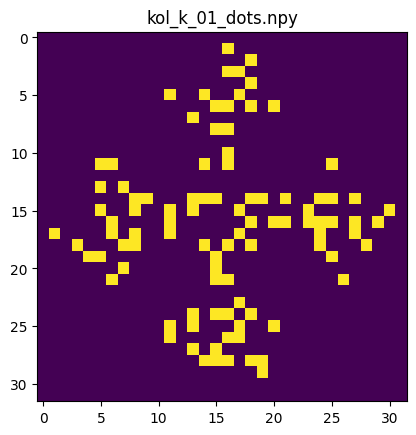

   ✔ Saved cleaned file.

kol_k_02_dots.npy: shape (32, 32), dtype int64


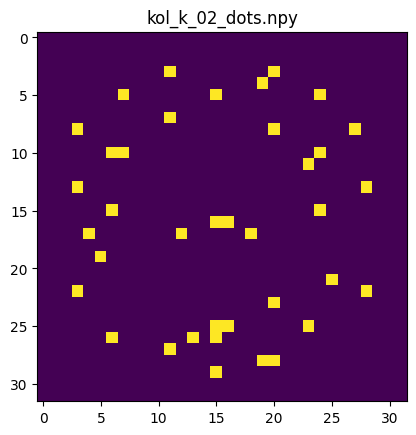

   ✔ Saved cleaned file.

kol_k_03_dots.npy: shape (32, 32), dtype int64


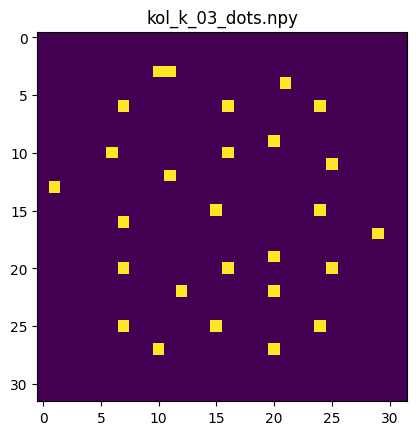

   ✔ Saved cleaned file.

kol_k_04_dots.npy: shape (32, 32), dtype int64


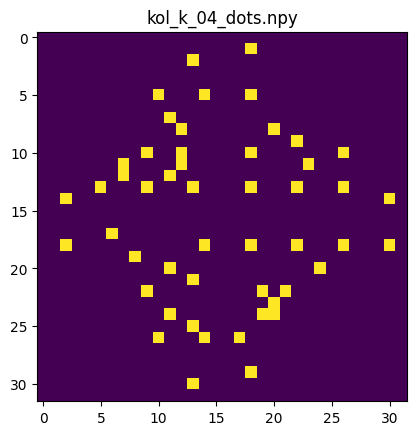

   ✔ Saved cleaned file.

kol_k_05_dots.npy: shape (32, 32), dtype int64


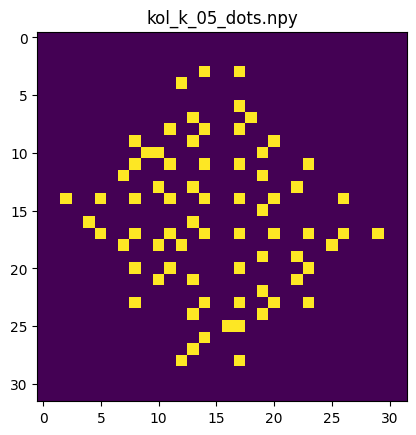

   ✔ Saved cleaned file.

kol_k_06_dots.npy: shape (32, 32), dtype int64


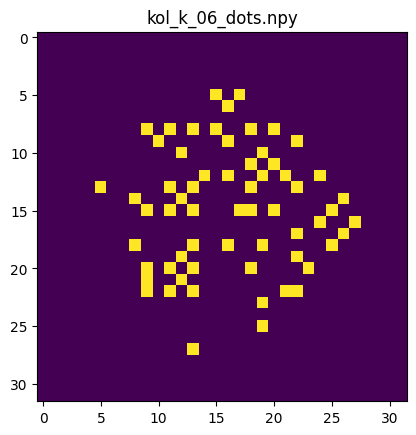

   ✔ Saved cleaned file.

kol_k_07_dots.npy: shape (32, 32), dtype int64


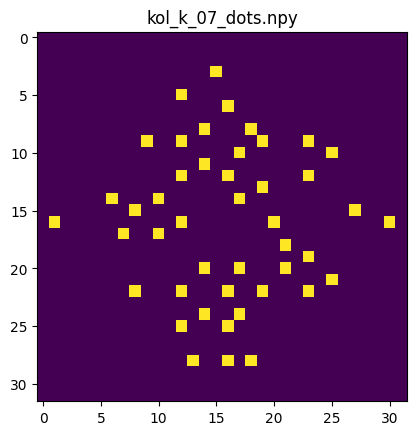

   ✔ Saved cleaned file.

kol_k_08_dots.npy: shape (32, 32), dtype int64


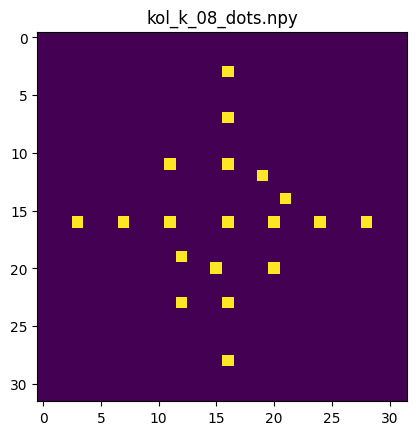

   ✔ Saved cleaned file.

kol_k_09_dots.npy: shape (32, 32), dtype int64


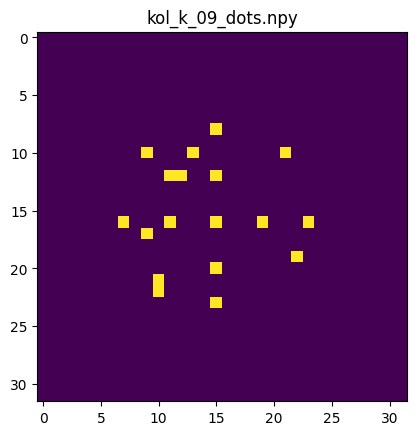

   ✔ Saved cleaned file.

kol_k_100_dots.npy: shape (32, 32), dtype int64


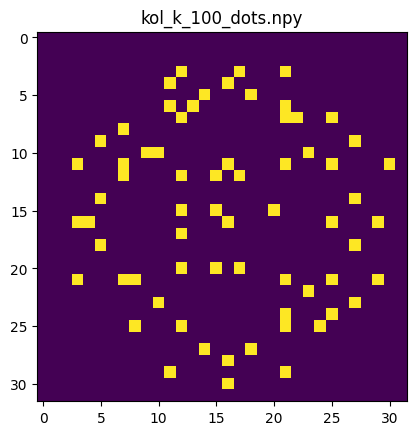

   ✔ Saved cleaned file.

kol_k_10_dots.npy: shape (32, 32), dtype int64


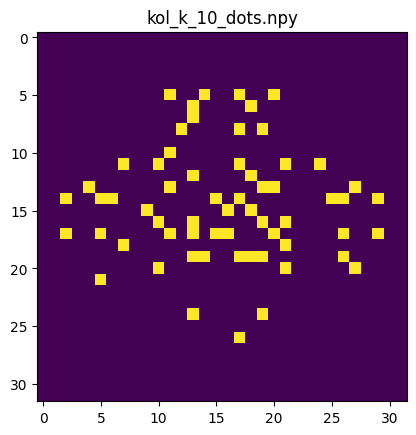

   ✔ Saved cleaned file.

kol_k_11_dots.npy: shape (32, 32), dtype int64


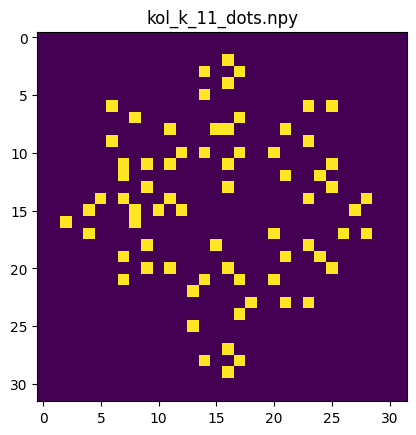

   ✔ Saved cleaned file.

kol_k_12_dots.npy: shape (32, 32), dtype int64


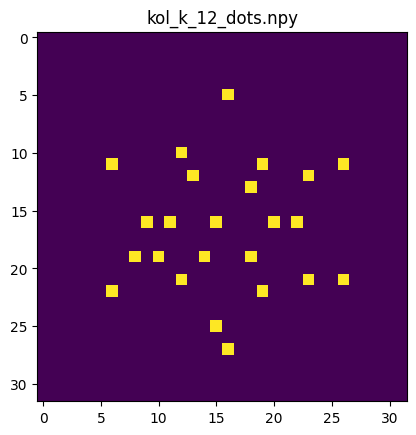

   ✔ Saved cleaned file.

kol_k_13_dots.npy: shape (32, 32), dtype int64


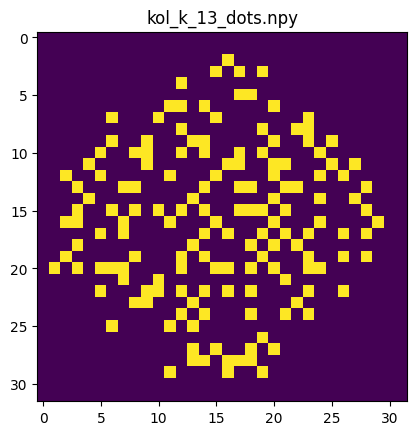

   ✔ Saved cleaned file.

kol_k_14_dots.npy: shape (32, 32), dtype int64


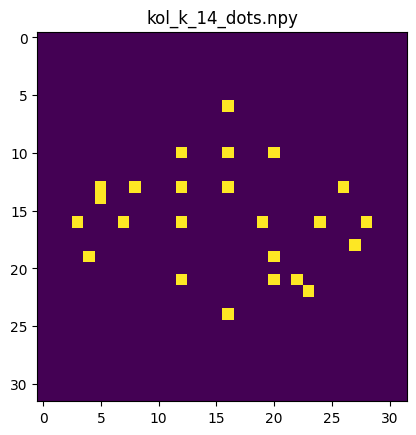

   ✔ Saved cleaned file.

kol_k_15_dots.npy: shape (32, 32), dtype int64


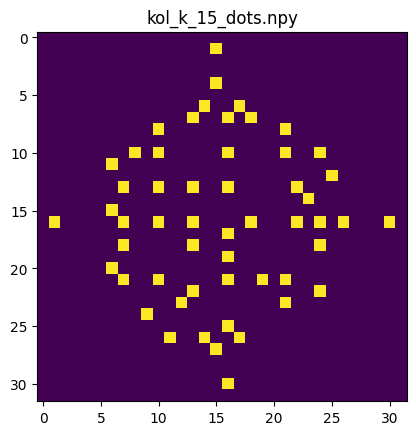

   ✔ Saved cleaned file.

kol_k_16_dots.npy: shape (32, 32), dtype int64


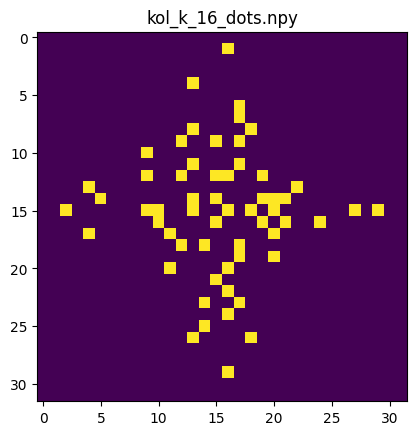

   ✔ Saved cleaned file.

kol_k_17_dots.npy: shape (32, 32), dtype int64


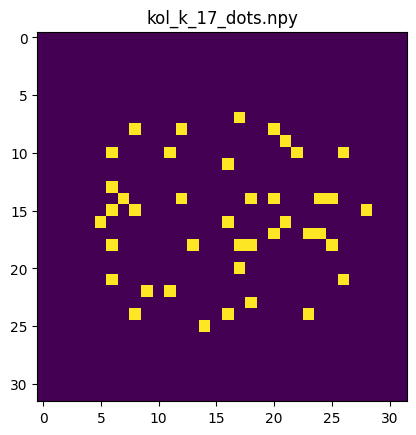

   ✔ Saved cleaned file.

kol_k_18_dots.npy: shape (32, 32), dtype int64


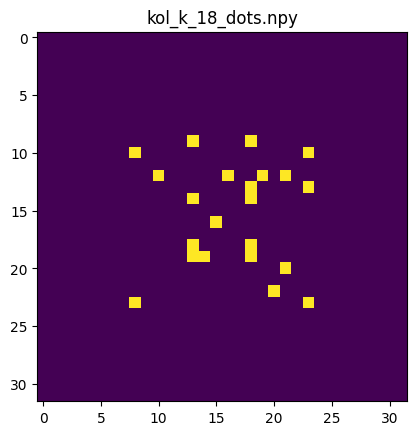

   ✔ Saved cleaned file.

kol_k_19_dots.npy: shape (32, 32), dtype int64


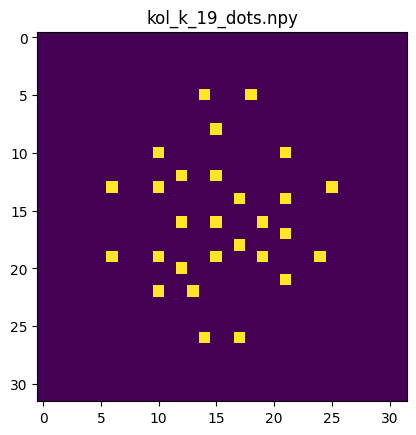

   ✔ Saved cleaned file.

kol_k_20_dots.npy: shape (32, 32), dtype int64


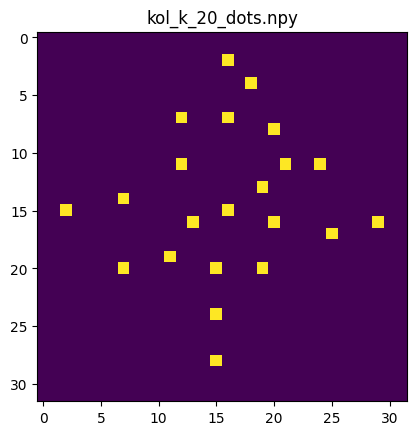

   ✔ Saved cleaned file.

kol_k_21_dots.npy: shape (32, 32), dtype int64


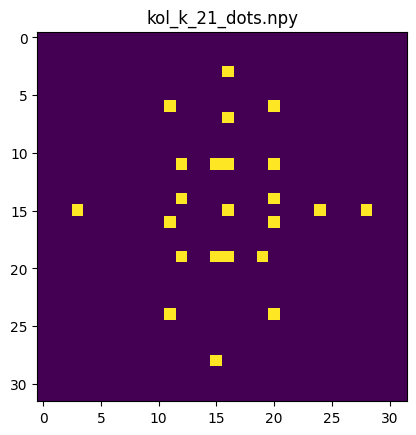

   ✔ Saved cleaned file.

kol_k_22_dots.npy: shape (32, 32), dtype int64


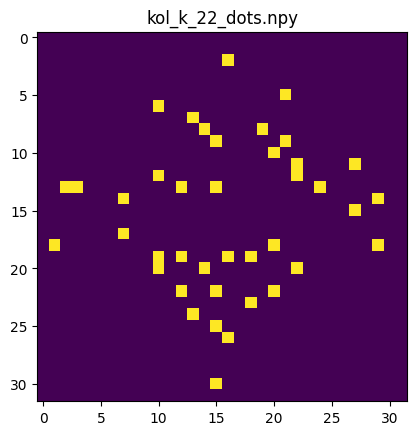

   ✔ Saved cleaned file.

kol_k_23_dots.npy: shape (32, 32), dtype int64


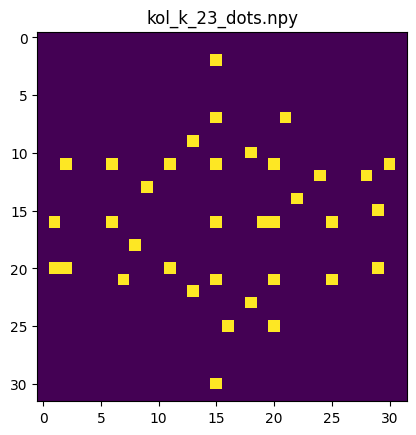

   ✔ Saved cleaned file.

kol_k_24_dots.npy: shape (32, 32), dtype int64


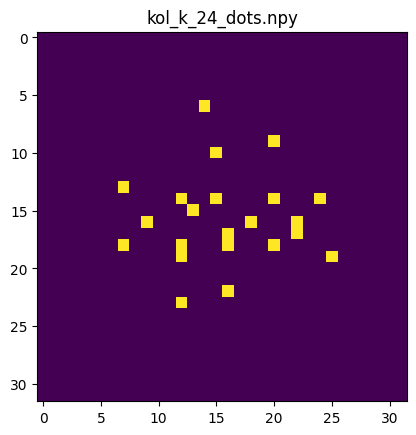

   ✔ Saved cleaned file.

kol_k_25_dots.npy: shape (32, 32), dtype int64


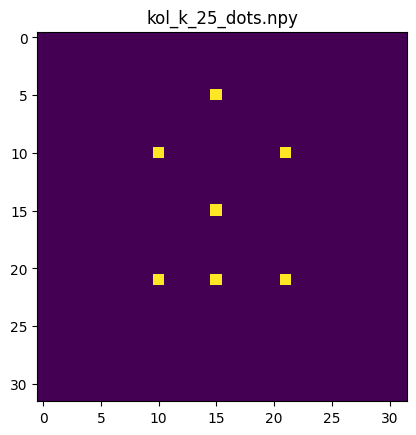

   ✔ Saved cleaned file.

kol_k_26_dots.npy: shape (32, 32), dtype int64


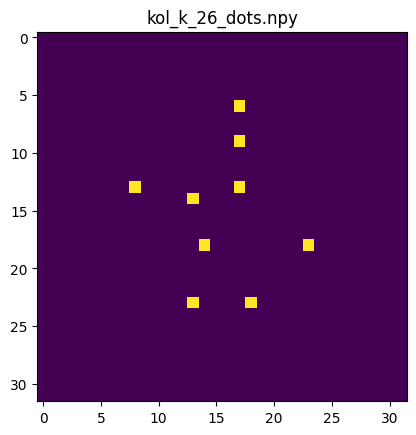

   ✔ Saved cleaned file.

kol_k_27_dots.npy: shape (32, 32), dtype int64


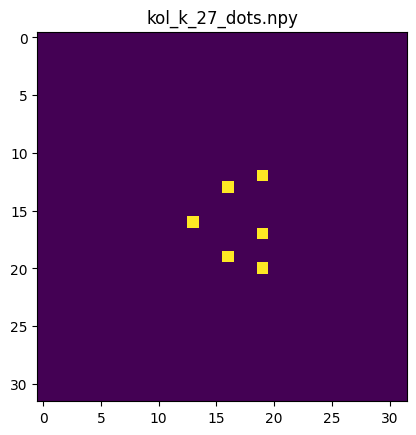

   ✔ Saved cleaned file.

kol_k_28_dots.npy: shape (32, 32), dtype int64


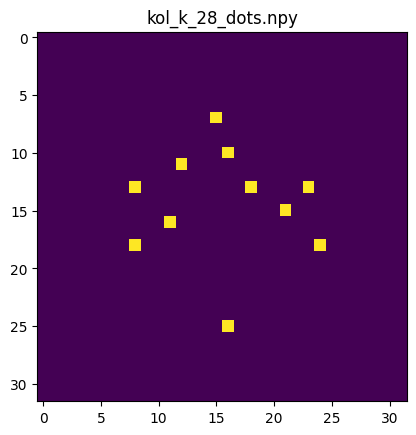

   ✔ Saved cleaned file.

kol_k_29_dots.npy: shape (32, 32), dtype int64


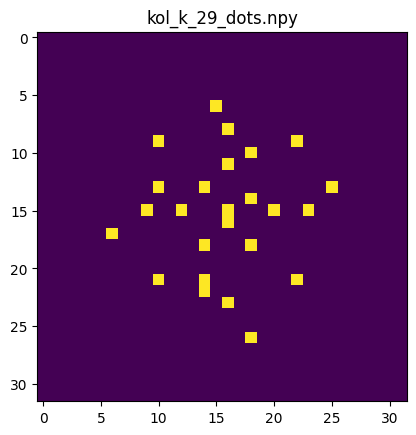

   ✔ Saved cleaned file.

kol_k_30_dots.npy: shape (32, 32), dtype int64


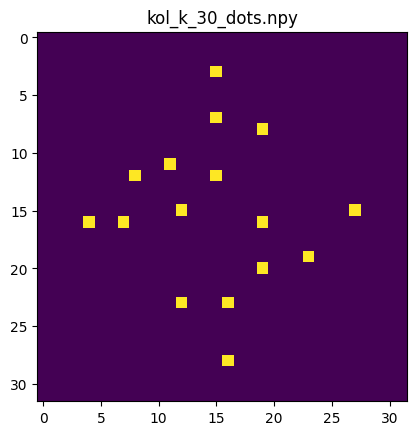

   ✔ Saved cleaned file.

kol_k_31_dots.npy: shape (32, 32), dtype int64


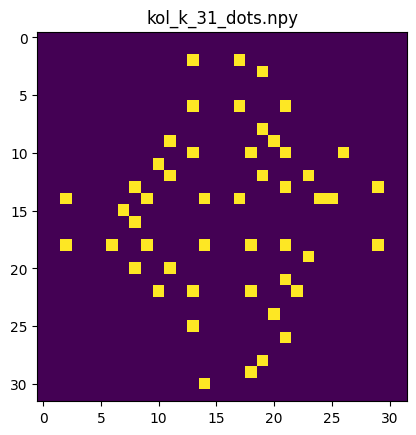

   ✔ Saved cleaned file.

kol_k_32_dots.npy: shape (32, 32), dtype int64


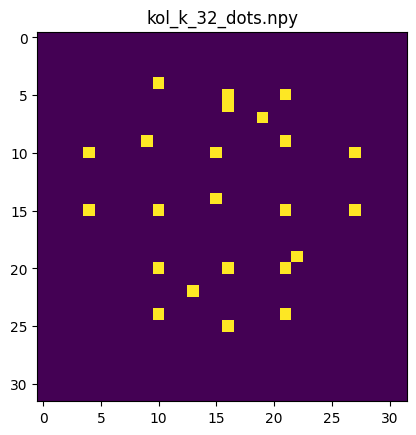

   ✔ Saved cleaned file.

kol_k_33_dots.npy: shape (32, 32), dtype int64


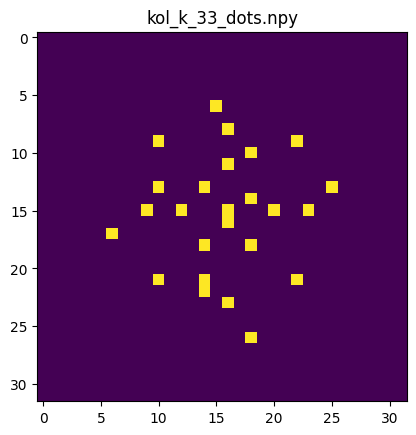

   ✔ Saved cleaned file.

kol_k_34_dots.npy: shape (32, 32), dtype int64


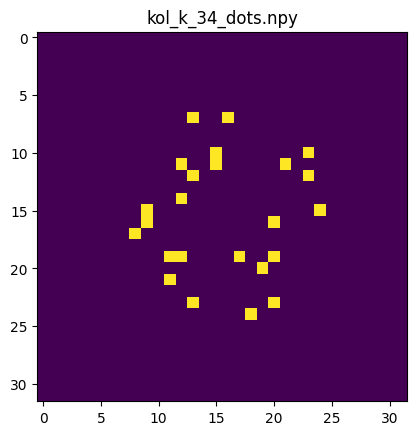

   ✔ Saved cleaned file.

kol_k_35_dots.npy: shape (32, 32), dtype int64


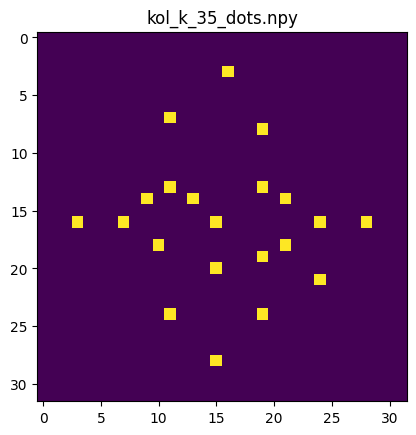

   ✔ Saved cleaned file.

kol_k_36_dots.npy: shape (32, 32), dtype int64


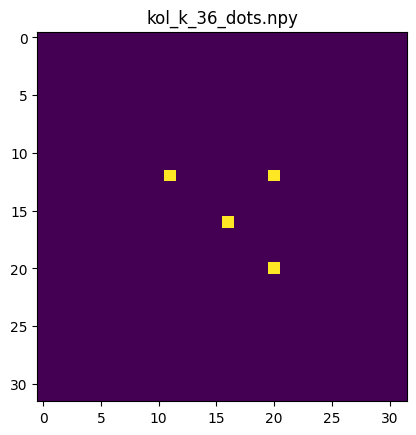

   ✔ Saved cleaned file.

kol_k_37_dots.npy: shape (32, 32), dtype int64


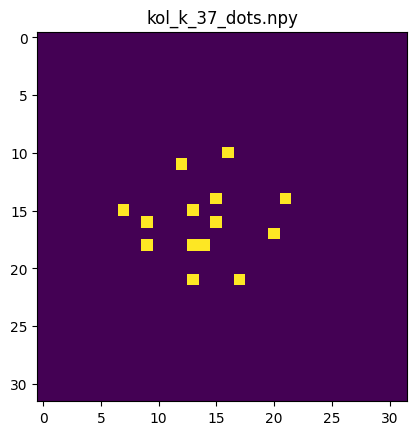

   ✔ Saved cleaned file.

kol_k_38_dots.npy: shape (32, 32), dtype int64


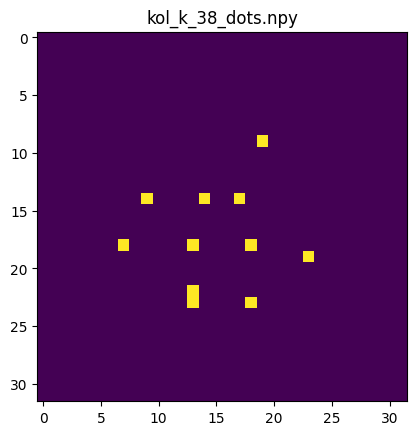

   ✔ Saved cleaned file.

kol_k_39_dots.npy: shape (32, 32), dtype int64


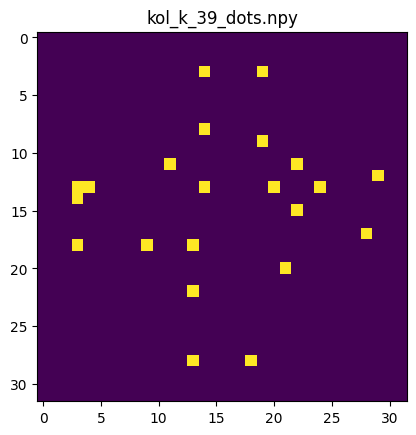

   ✔ Saved cleaned file.

kol_k_40_dots.npy: shape (32, 32), dtype int64


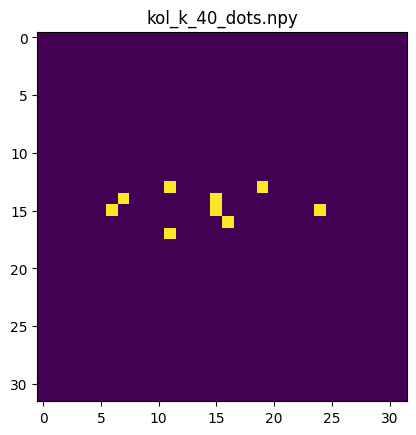

   ✔ Saved cleaned file.

kol_k_41_dots.npy: shape (32, 32), dtype int64


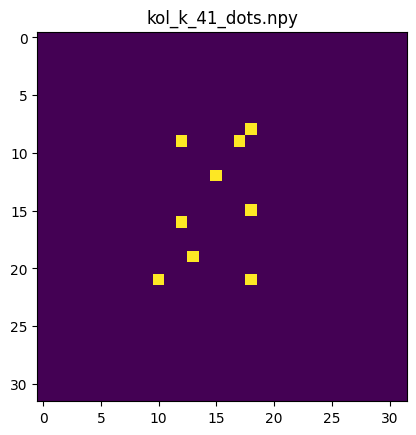

   ✔ Saved cleaned file.

kol_k_42_dots.npy: shape (32, 32), dtype int64


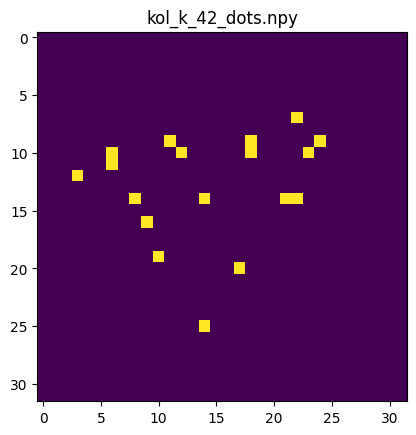

   ✔ Saved cleaned file.

kol_k_43_dots.npy: shape (32, 32), dtype int64


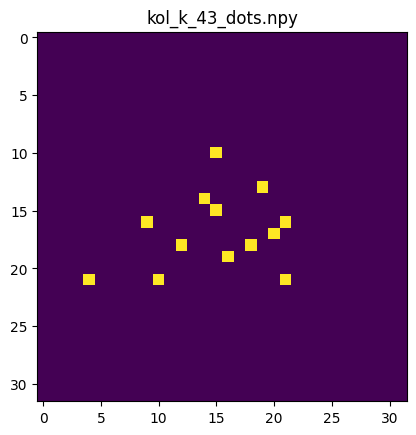

   ✔ Saved cleaned file.

kol_k_44_dots.npy: shape (32, 32), dtype int64


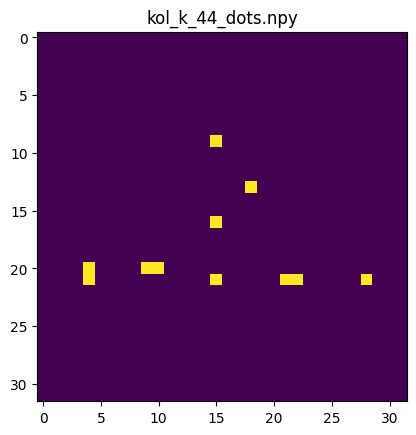

   ✔ Saved cleaned file.

kol_k_45_dots.npy: shape (32, 32), dtype int64


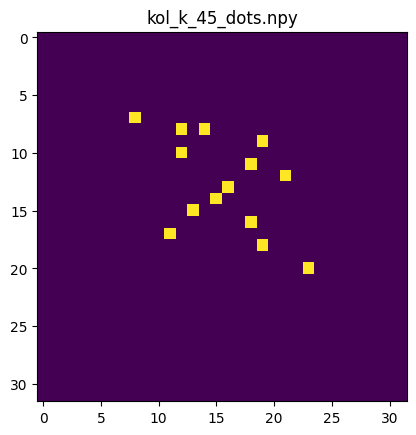

   ✔ Saved cleaned file.

kol_k_46_dots.npy: shape (32, 32), dtype int64


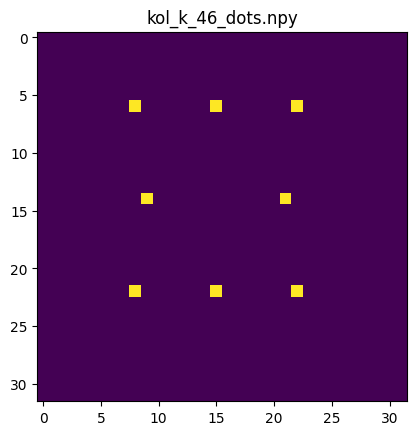

   ✔ Saved cleaned file.

kol_k_47_dots.npy: shape (32, 32), dtype int64


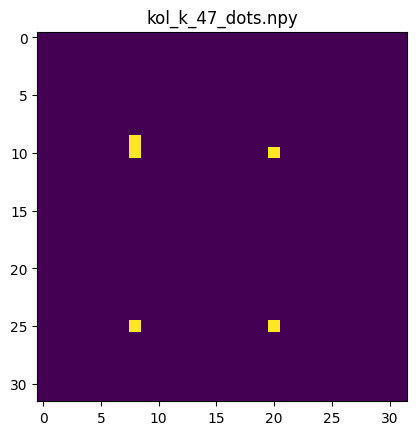

   ✔ Saved cleaned file.

kol_k_48_dots.npy: shape (32, 32), dtype int64


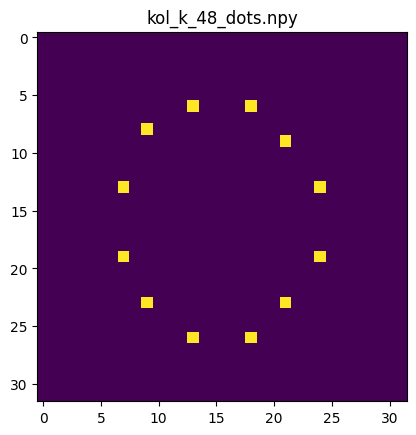

   ✔ Saved cleaned file.

kol_k_49_dots.npy: shape (32, 32), dtype int64


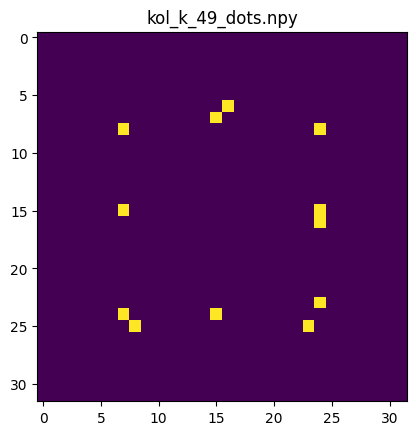

   ✔ Saved cleaned file.

kol_k_50_dots.npy: shape (32, 32), dtype int64


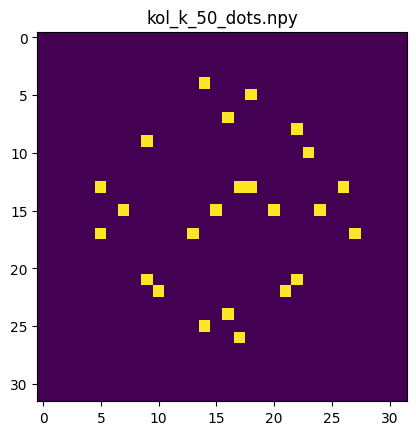

   ✔ Saved cleaned file.

kol_k_51_dots.npy: shape (32, 32), dtype int64


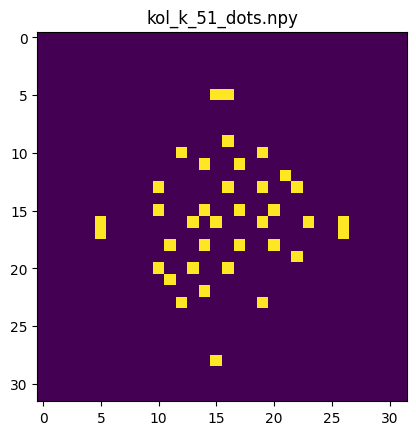

   ✔ Saved cleaned file.

kol_k_52_dots.npy: shape (32, 32), dtype int64


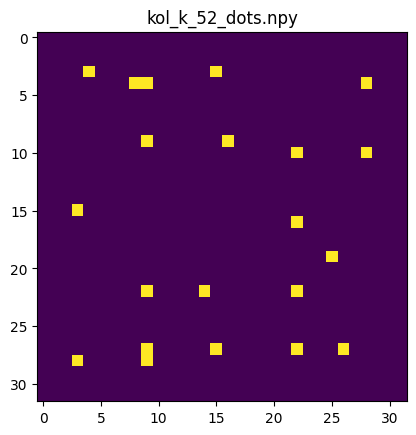

   ✔ Saved cleaned file.

kol_k_53_dots.npy: shape (32, 32), dtype int64


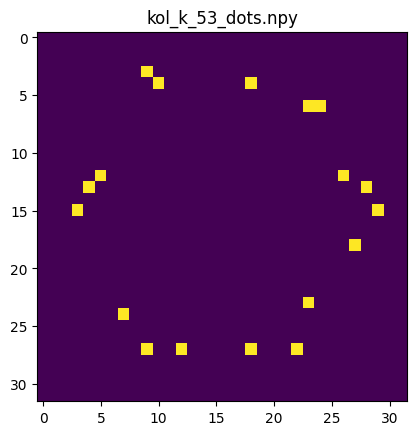

   ✔ Saved cleaned file.

kol_k_54_dots.npy: shape (32, 32), dtype int64


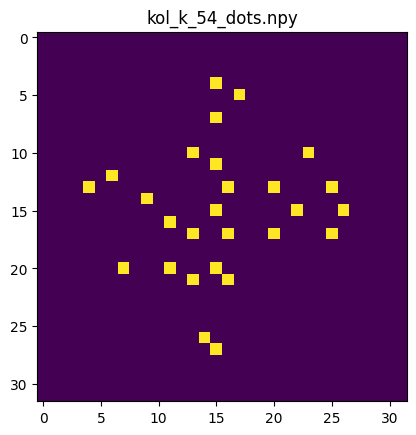

   ✔ Saved cleaned file.

kol_k_55_dots.npy: shape (32, 32), dtype int64


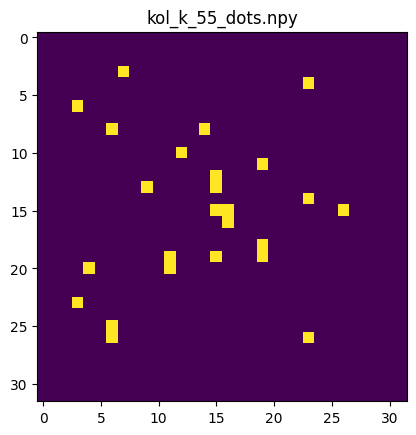

   ✔ Saved cleaned file.

kol_k_56_dots.npy: shape (32, 32), dtype int64


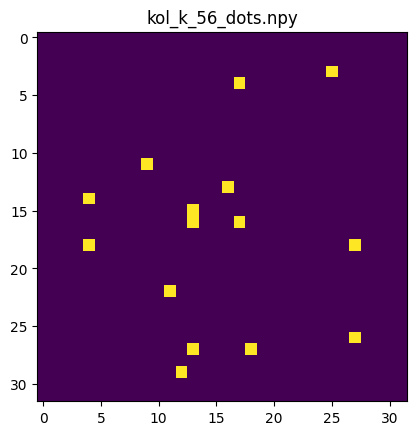

   ✔ Saved cleaned file.

kol_k_57_dots.npy: shape (32, 32), dtype int64


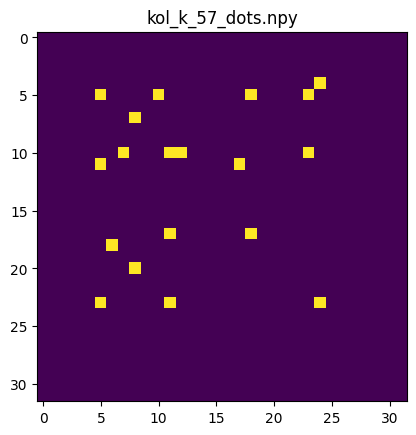

   ✔ Saved cleaned file.

kol_k_58_dots.npy: shape (32, 32), dtype int64


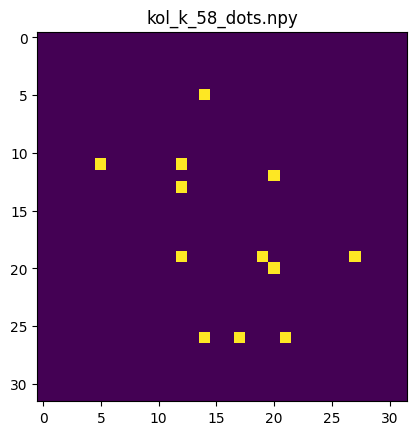

   ✔ Saved cleaned file.

kol_k_59_dots.npy: shape (32, 32), dtype int64


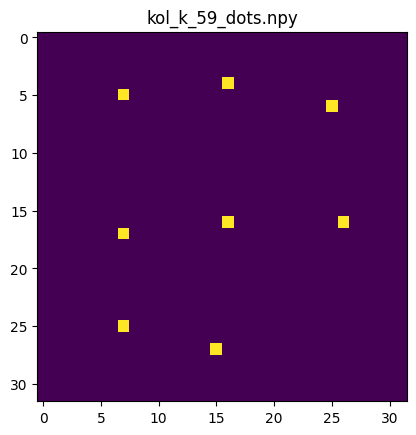

   ✔ Saved cleaned file.

kol_k_60_dots.npy: shape (32, 32), dtype int64


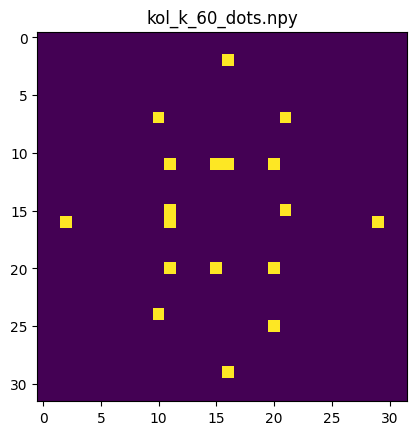

   ✔ Saved cleaned file.

kol_k_61_dots.npy: shape (32, 32), dtype int64


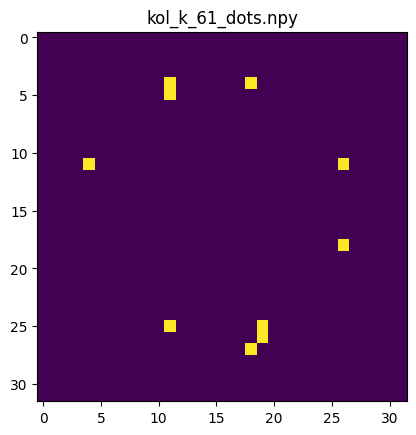

   ✔ Saved cleaned file.

kol_k_62_dots.npy: shape (32, 32), dtype int64


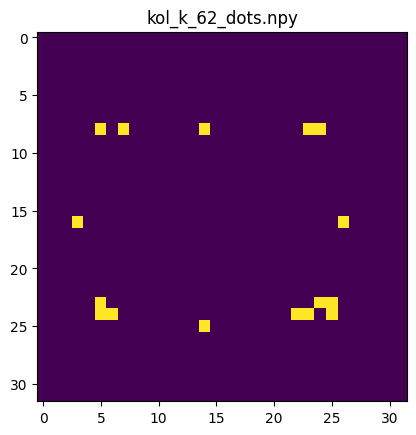

   ✔ Saved cleaned file.

kol_k_63_dots.npy: shape (32, 32), dtype int64


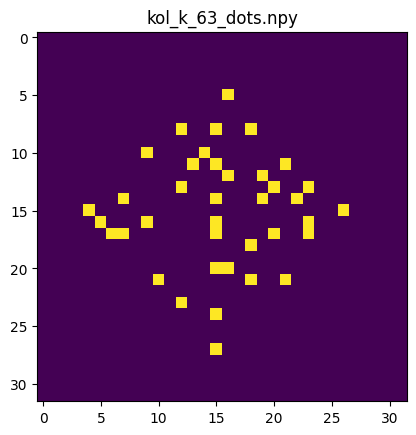

   ✔ Saved cleaned file.

kol_k_64_dots.npy: shape (32, 32), dtype int64


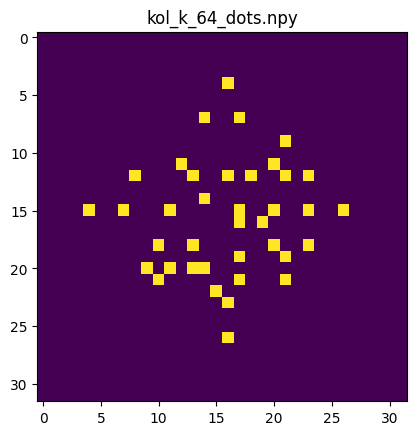

   ✔ Saved cleaned file.

kol_k_65_dots.npy: shape (32, 32), dtype int64


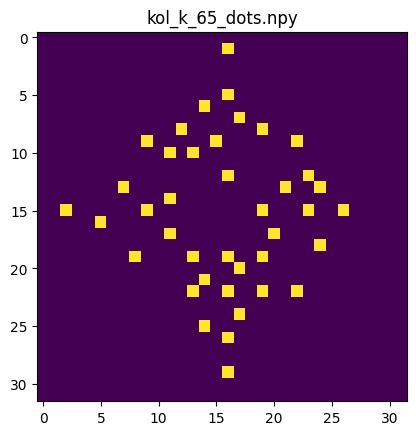

   ✔ Saved cleaned file.

kol_k_66_dots.npy: shape (32, 32), dtype int64


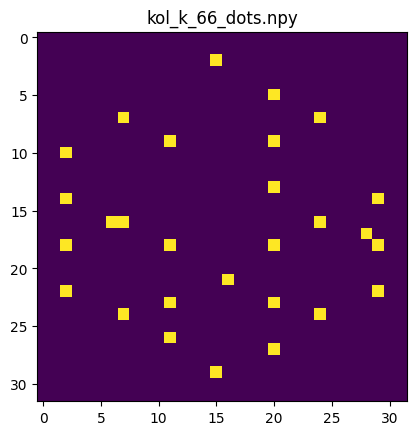

   ✔ Saved cleaned file.

kol_k_67_dots.npy: shape (32, 32), dtype int64


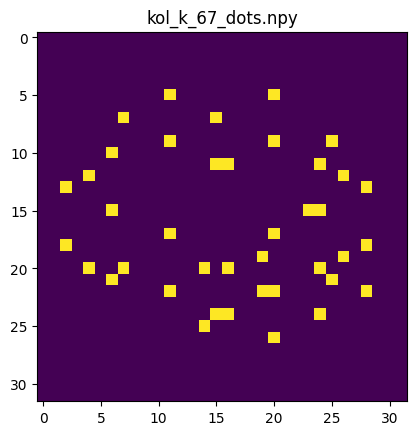

   ✔ Saved cleaned file.

kol_k_68_dots.npy: shape (32, 32), dtype int64


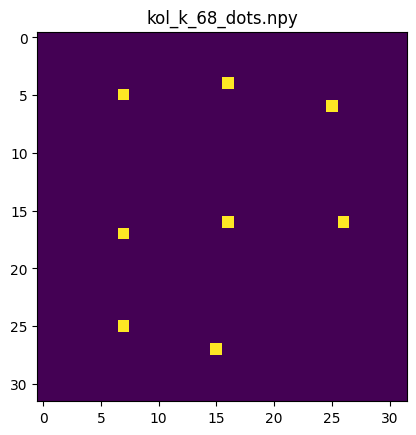

   ✔ Saved cleaned file.

kol_k_69_dots.npy: shape (32, 32), dtype int64


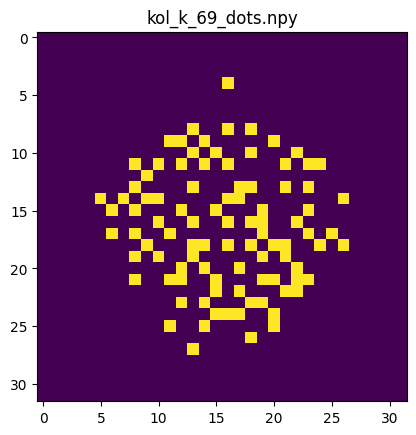

   ✔ Saved cleaned file.

kol_k_70_dots.npy: shape (32, 32), dtype int64


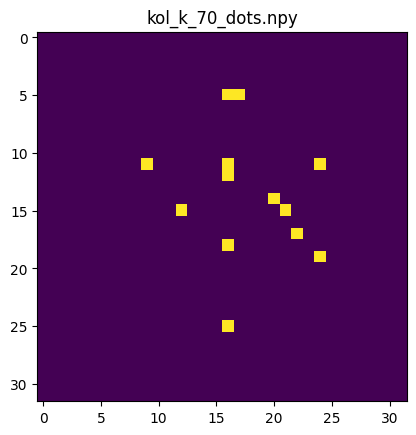

   ✔ Saved cleaned file.

kol_k_71_dots.npy: shape (32, 32), dtype int64


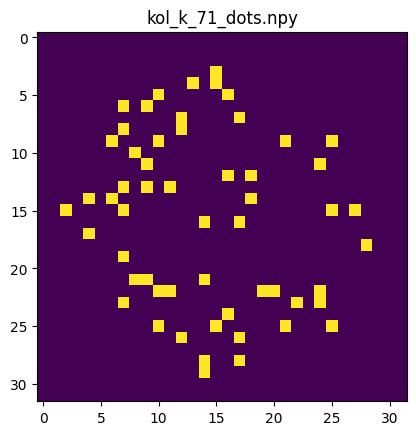

   ✔ Saved cleaned file.

kol_k_72_dots.npy: shape (32, 32), dtype int64


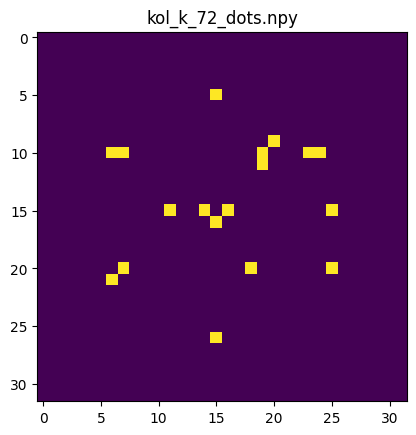

   ✔ Saved cleaned file.

kol_k_73_dots.npy: shape (32, 32), dtype int64


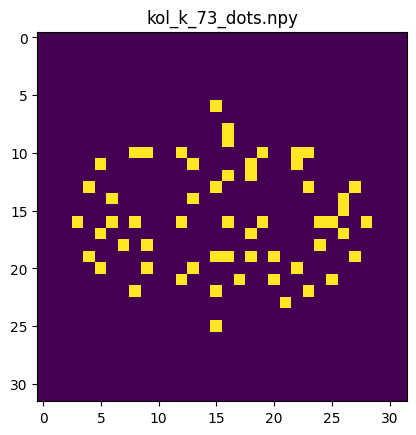

   ✔ Saved cleaned file.

kol_k_74_dots.npy: shape (32, 32), dtype int64


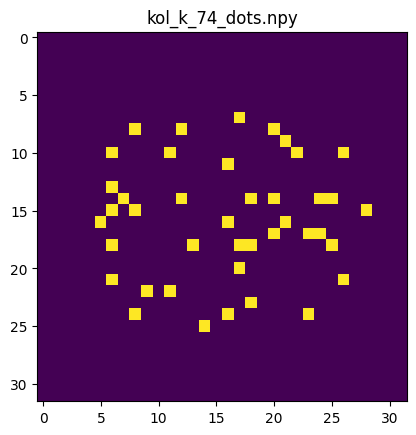

   ✔ Saved cleaned file.

kol_k_75_dots.npy: shape (32, 32), dtype int64


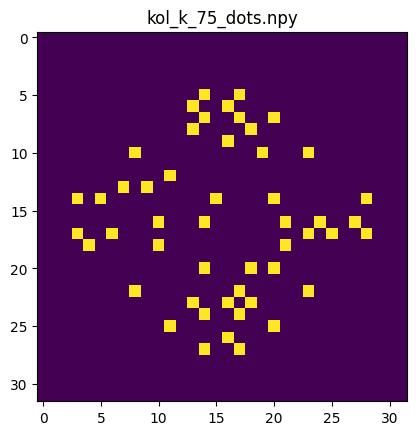

   ✔ Saved cleaned file.

kol_k_76_dots.npy: shape (32, 32), dtype int64


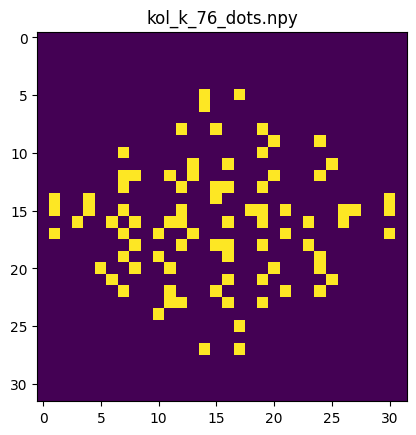

   ✔ Saved cleaned file.

kol_k_77_dots.npy: shape (32, 32), dtype int64


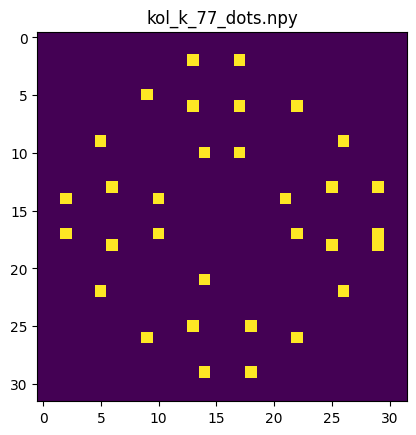

   ✔ Saved cleaned file.

kol_k_78_dots.npy: shape (32, 32), dtype int64


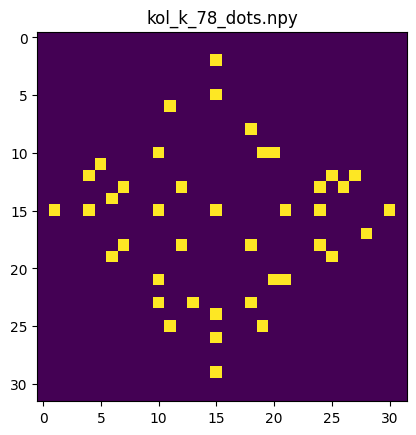

   ✔ Saved cleaned file.

kol_k_79_dots.npy: shape (32, 32), dtype int64


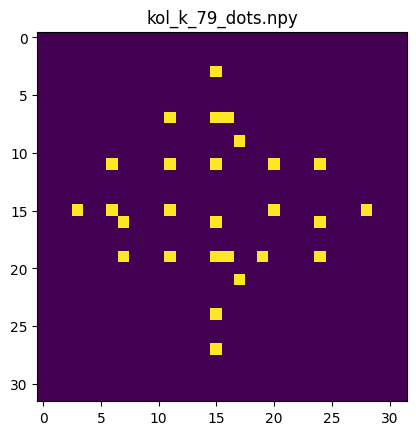

   ✔ Saved cleaned file.

kol_k_80_dots.npy: shape (32, 32), dtype int64


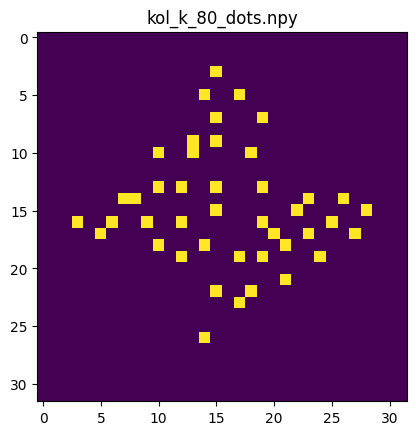

   ✔ Saved cleaned file.

kol_k_81_dots.npy: shape (32, 32), dtype int64


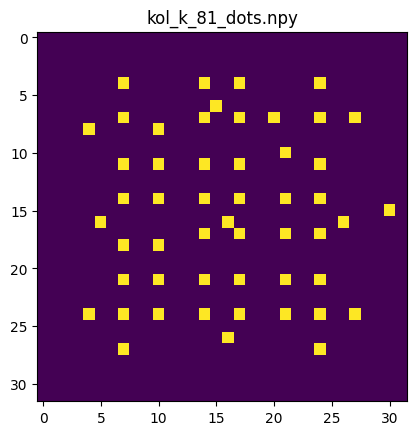

   ✔ Saved cleaned file.

kol_k_82_dots.npy: shape (32, 32), dtype int64


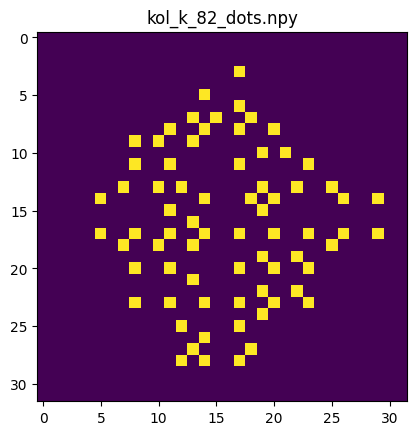

   ✔ Saved cleaned file.

kol_k_83_dots.npy: shape (32, 32), dtype int64


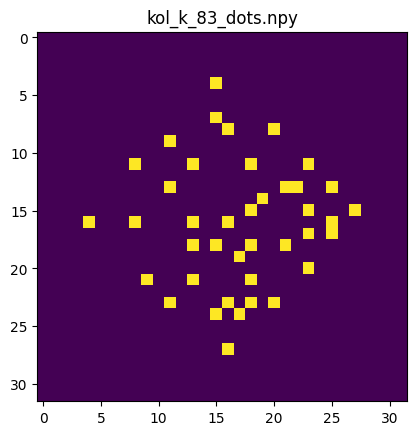

   ✔ Saved cleaned file.

kol_k_84_dots.npy: shape (32, 32), dtype int64


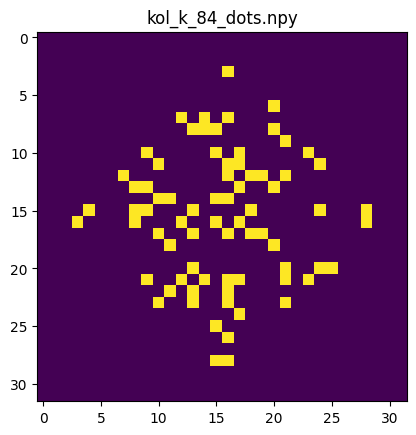

   ✔ Saved cleaned file.

kol_k_85_dots.npy: shape (32, 32), dtype int64


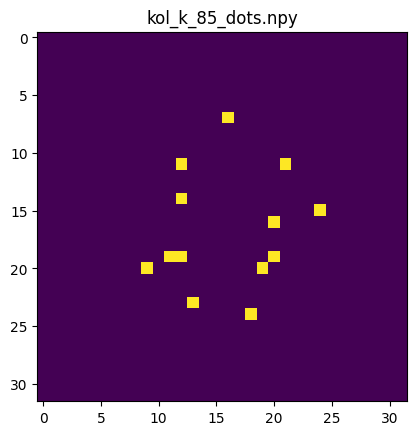

   ✔ Saved cleaned file.

kol_k_86_dots.npy: shape (32, 32), dtype int64


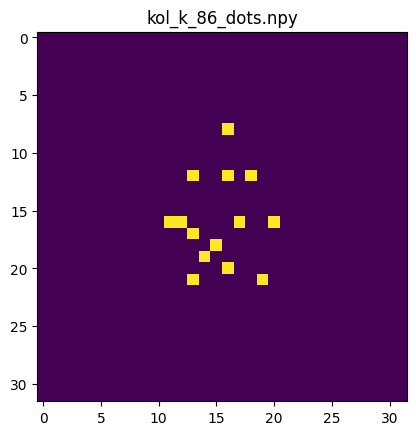

   ✔ Saved cleaned file.

kol_k_87_dots.npy: shape (32, 32), dtype int64


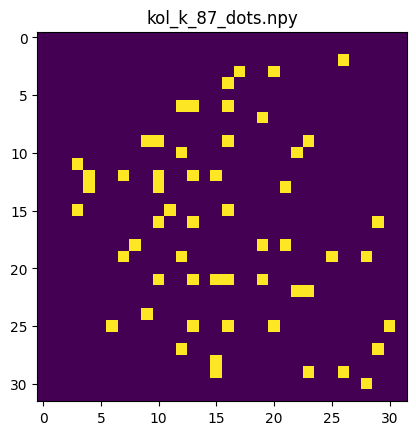

   ✔ Saved cleaned file.

kol_k_88_dots.npy: shape (32, 32), dtype int64


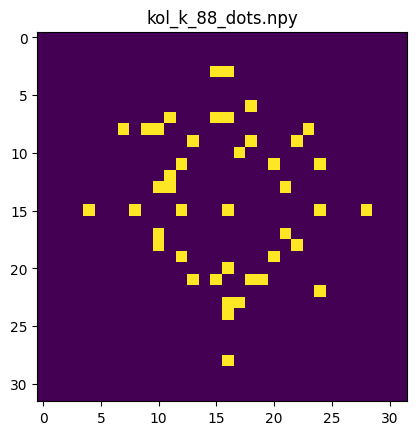

   ✔ Saved cleaned file.

kol_k_89_dots.npy: shape (32, 32), dtype int64


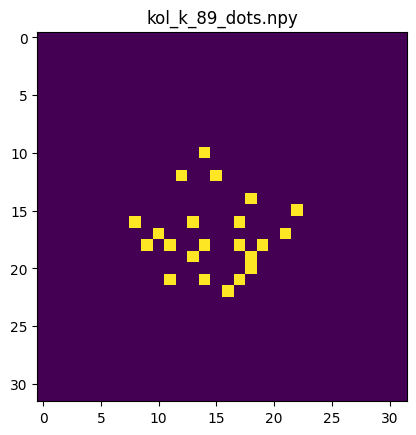

   ✔ Saved cleaned file.

kol_k_90_dots.npy: shape (32, 32), dtype int64


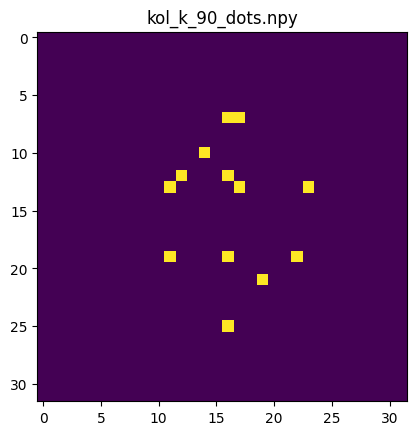

   ✔ Saved cleaned file.

kol_k_91_dots.npy: shape (32, 32), dtype int64


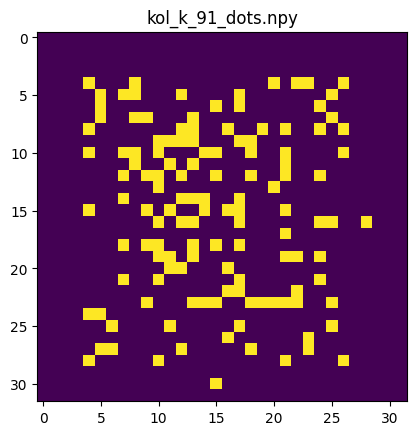

   ✔ Saved cleaned file.

kol_k_92_dots.npy: shape (32, 32), dtype int64


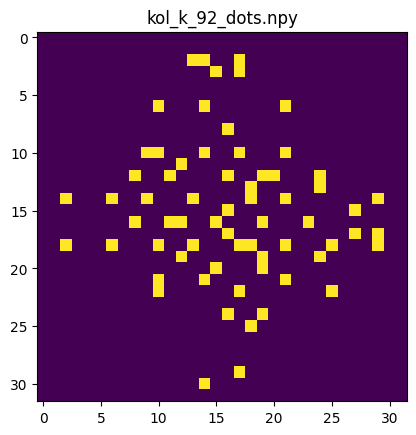

   ✔ Saved cleaned file.

kol_k_93_dots.npy: shape (32, 32), dtype int64


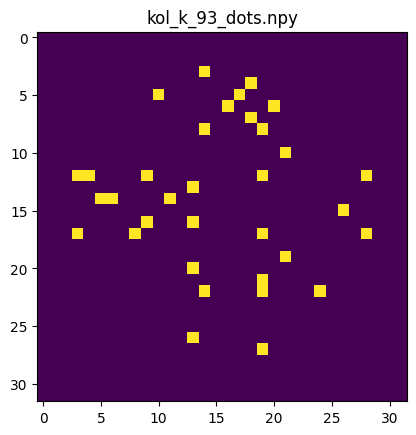

   ✔ Saved cleaned file.

kol_k_94_dots.npy: shape (32, 32), dtype int64


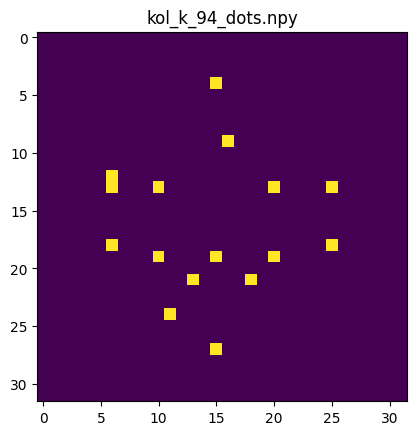

   ✔ Saved cleaned file.

kol_k_95_dots.npy: shape (32, 32), dtype int64


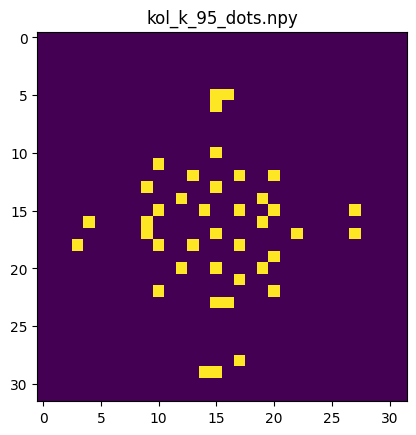

   ✔ Saved cleaned file.

kol_k_96_dots.npy: shape (32, 32), dtype int64


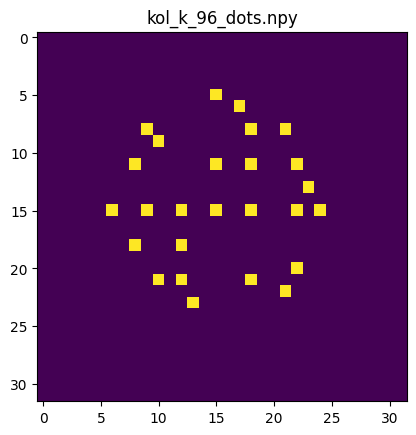

   ✔ Saved cleaned file.

kol_k_97_dots.npy: shape (32, 32), dtype int64


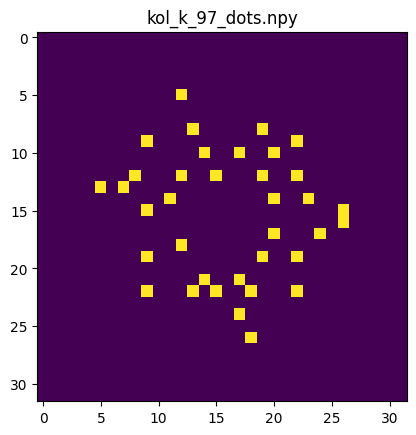

   ✔ Saved cleaned file.

kol_k_98_dots.npy: shape (32, 32), dtype int64


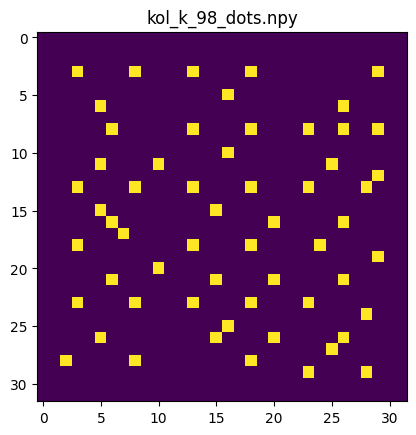

   ✔ Saved cleaned file.

kol_k_99_dots.npy: shape (32, 32), dtype int64


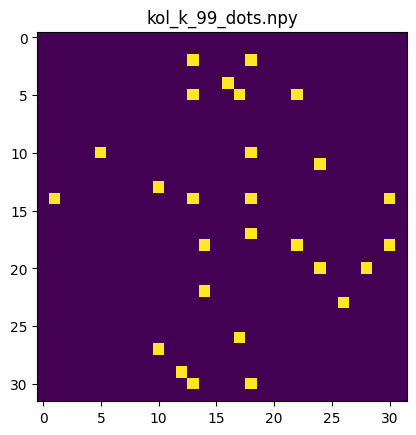

   ✔ Saved cleaned file.


In [19]:
#cleaning the numpy files - making them all uniform 
import os, numpy as np, cv2, matplotlib.pyplot as plt

input_folder  = "dataset/processed/p_kambi/grids_k"
output_folder = "dataset/processed/p_kambi/gr_k_cleaned"
os.makedirs(output_folder, exist_ok=True)

for fname in os.listdir(input_folder):
    if not fname.endswith(".npy"):
        continue
    fpath = os.path.join(input_folder, fname)
    arr = np.load(fpath, allow_pickle=False)

    print(f"\n{fname}: shape {arr.shape}, dtype {arr.dtype}")

    # ---- Skip anything that isn't a plain 2D/3D numeric array ----
    if arr.ndim not in (2, 3) or arr.size == 0 or not np.issubdtype(arr.dtype, np.number):
        print("   ⚠️  Skipping: not a valid image array.")
        continue

    # ---- Quick visual check ----
    plt.imshow(arr if arr.ndim == 2 else arr[..., :3])
    plt.title(fname)
    plt.show()

    # ---- Resize only if height/width differ ----
    h, w = arr.shape[:2]
    if (h, w) != (256, 256):
        arr = cv2.resize(arr.astype(np.float32), (256, 256), interpolation=cv2.INTER_AREA)

    # ---- Normalize to 0–1 float32 ----
    if arr.max() > 1:
        arr = arr.astype(np.float32) / 255.0

    np.save(os.path.join(output_folder, fname), arr)
    print("   ✔ Saved cleaned file.")


In [20]:
"""#making the dots brighter and such - so dot detction is easy.
#✅ So you can safely skip this enhancement step unless you plan to run another detection pass on these saved .npy files.
import os, numpy as np, cv2

input_folder  = "dataset/processed/p_sikku/gr_s_cleaned"       # from Step 1
output_folder = "dataset/processed/p_sikku/preprocessed_npy"  # new folder
os.makedirs(output_folder, exist_ok=True)

for fname in os.listdir(input_folder):
    if not fname.endswith(".npy"):
        continue
    fpath = os.path.join(input_folder, fname)
    img = np.load(fpath)

    # ensure grayscale float [0,1]
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if img.max() > 1:
        img = img.astype(np.float32) / 255.0

    # 1. enhance contrast
    img_8u = (img * 255).astype(np.uint8)
    clahe  = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(img_8u)

    # 2. reduce noise
    blurred = cv2.medianBlur(enhanced, 5)

    # 3. optional threshold (binary)
    # _, binary = cv2.threshold(blurred, 0, 255,
    #                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    np.save(os.path.join(output_folder, fname), blurred)
"""

'#making the dots brighter and such - so dot detction is easy.\n#✅ So you can safely skip this enhancement step unless you plan to run another detection pass on these saved .npy files.\nimport os, numpy as np, cv2\n\ninput_folder  = "dataset/processed/p_sikku/gr_s_cleaned"       # from Step 1\noutput_folder = "dataset/processed/p_sikku/preprocessed_npy"  # new folder\nos.makedirs(output_folder, exist_ok=True)\n\nfor fname in os.listdir(input_folder):\n    if not fname.endswith(".npy"):\n        continue\n    fpath = os.path.join(input_folder, fname)\n    img = np.load(fpath)\n\n    # ensure grayscale float [0,1]\n    if img.ndim == 3:\n        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)\n    if img.max() > 1:\n        img = img.astype(np.float32) / 255.0\n\n    # 1. enhance contrast\n    img_8u = (img * 255).astype(np.uint8)\n    clahe  = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))\n    enhanced = clahe.apply(img_8u)\n\n    # 2. reduce noise\n    blurred = cv2.medianBlur(enhance

In [21]:
"""#finding dot locations for images and saving the locations in csv file + saving oeverlay images
#But if you already have those CSVs from earlier processing, you don’t need to re-run this
import os, numpy as np, cv2, csv, matplotlib.pyplot as plt

input_folder  = "dataset/processed/p_sikku/preprocessed_npy_s"
csv_folder    = "dataset/processed/p_sikku/dot_csv_s"
overlay_folder = "dataset/processed/p_sikku/dot_overlay_s"
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(overlay_folder, exist_ok=True)

for fname in os.listdir(input_folder):
    if not fname.endswith(".npy"): continue
    img = np.load(os.path.join(input_folder, fname))

    img_8u  = (img * 255).astype('uint8')
    blurred = cv2.medianBlur(img_8u, 5)

    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT,
        dp=1, minDist=15,
        param1=110, param2=20,
        minRadius=2, maxRadius=22
    )

    if circles is None:
        print(f"No dots found in {fname}")
        continue

    circles = np.uint16(np.around(circles[0]))
    coords = [(int(x), int(y)) for x, y, r in circles]

    # Save CSV
    with open(os.path.join(csv_folder, fname.replace('.npy','.csv')), 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['x','y'])
        writer.writerows(coords)

    # Save overlay for QC
    overlay = cv2.cvtColor(img_8u, cv2.COLOR_GRAY2BGR)
    for (x, y) in coords:
        cv2.circle(overlay, (x, y), 3, (0,0,255), -1)
    cv2.imwrite(os.path.join(overlay_folder, fname.replace('.npy','.png')), overlay)"""


'#finding dot locations for images and saving the locations in csv file + saving oeverlay images\n#But if you already have those CSVs from earlier processing, you don’t need to re-run this\nimport os, numpy as np, cv2, csv, matplotlib.pyplot as plt\n\ninput_folder  = "dataset/processed/p_sikku/preprocessed_npy_s"\ncsv_folder    = "dataset/processed/p_sikku/dot_csv_s"\noverlay_folder = "dataset/processed/p_sikku/dot_overlay_s"\nos.makedirs(csv_folder, exist_ok=True)\nos.makedirs(overlay_folder, exist_ok=True)\n\nfor fname in os.listdir(input_folder):\n    if not fname.endswith(".npy"): continue\n    img = np.load(os.path.join(input_folder, fname))\n\n    img_8u  = (img * 255).astype(\'uint8\')\n    blurred = cv2.medianBlur(img_8u, 5)\n\n    circles = cv2.HoughCircles(\n        blurred, cv2.HOUGH_GRADIENT,\n        dp=1, minDist=15,\n        param1=110, param2=20,\n        minRadius=2, maxRadius=22\n    )\n\n    if circles is None:\n        print(f"No dots found in {fname}")\n        con

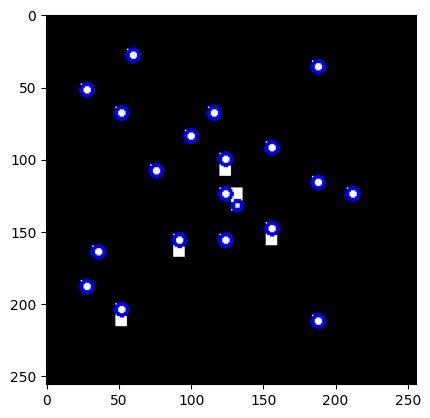

In [26]:
import cv2, numpy as np, matplotlib.pyplot as plt

img = np.load("dataset/processed/p_kambi/gr_k_cleaned/kol_k_55_dots.npy")
img_8u = (img * 255).astype('uint8')
blurred = cv2.medianBlur(img_8u, 5)

circles = cv2.HoughCircles(
    blurred, cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=10,
    param1=80,
    param2=10,
    minRadius=1,
    maxRadius=30
)

overlay = cv2.cvtColor(img_8u, cv2.COLOR_GRAY2BGR)
if circles is not None:
    for x, y, r in np.uint16(np.around(circles[0])):
        cv2.circle(overlay, (x, y), r, (0,0,255), 2)

plt.imshow(overlay)
plt.show()
